In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv("./data/train_data_modified_new.csv")
train_data['OnPromotion']=train_data['OnPromotion'].astype(int)

In [3]:
display(train_data.dtypes)

CategoryCode        object
ItemCode             int64
DateID              object
DailySales           int64
Week                object
WeekID               int64
DiscountValue      float64
DiscountedPrice    float64
SellingPrice       float64
OnPromotion          int32
dtype: object

In [4]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales,Week,WeekID,DiscountValue,DiscountedPrice,SellingPrice,OnPromotion
0,category_2,117610,2021-10-01,1,w1,1,NaN,NaN,NaN,0
1,category_4,245581,2021-10-01,6,w1,1,NaN,NaN,NaN,0
2,category_2,1090258,2021-10-01,2,w1,1,NaN,NaN,NaN,0
3,category_2,39436,2021-10-01,60,w1,1,0.25,52.5,70.0,1
4,category_3,1090024,2021-10-01,4,w1,1,NaN,NaN,NaN,0


In [19]:
promotion_data=pd.read_csv("./data/promotion_data_with_weekId.csv")
promotion_data['OnPromotion']=promotion_data['OnPromotion'].astype(int)
promotion_data.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,SellingPrice,DiscountedPrice,WeekID,OnPromotion
0,1066570,2021-10-01,2021-10-07,0.15,45,38.25,1,1
1,267478,2021-10-01,2021-10-07,0.10,130,117.00,1,1
2,1006009,2021-10-01,2021-10-07,0.10,70,63.00,1,1
3,39436,2021-10-01,2021-10-07,0.25,70,52.50,1,1
4,132334,2021-10-01,2021-10-07,0.10,190,171.00,1,1


In [20]:
promotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ItemCode            314 non-null    int64  
 1   PromotionStartDate  314 non-null    object 
 2   PromotionEndDate    314 non-null    object 
 3   DiscountValue       314 non-null    float64
 4   SellingPrice        314 non-null    int64  
 5   DiscountedPrice     314 non-null    float64
 6   WeekID              314 non-null    int64  
 7   OnPromotion         314 non-null    int32  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 18.5+ KB


(array([2.0164e+04, 3.4000e+02, 9.9000e+01, 3.6000e+01, 7.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  44.3,  87.6, 130.9, 174.2, 217.5, 260.8, 304.1, 347.4,
        390.7, 434. ]),
 <BarContainer object of 10 artists>)

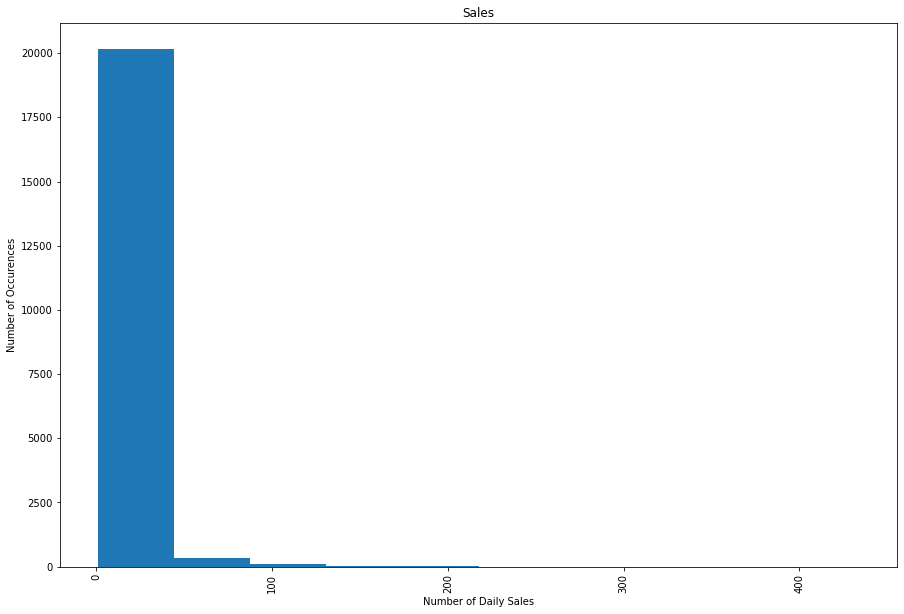

In [21]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation = 90)
plt.title("Sales")
plt.xlabel("Number of Daily Sales")
plt.ylabel("Number of Occurences")
plt.hist(train_data['DailySales'])

In [22]:
days_without_promotion = train_data.where(train_data['OnPromotion']==0.0)

(array([1.8614e+04, 2.7500e+02, 8.8000e+01, 3.3000e+01, 7.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  44.3,  87.6, 130.9, 174.2, 217.5, 260.8, 304.1, 347.4,
        390.7, 434. ]),
 <BarContainer object of 10 artists>)

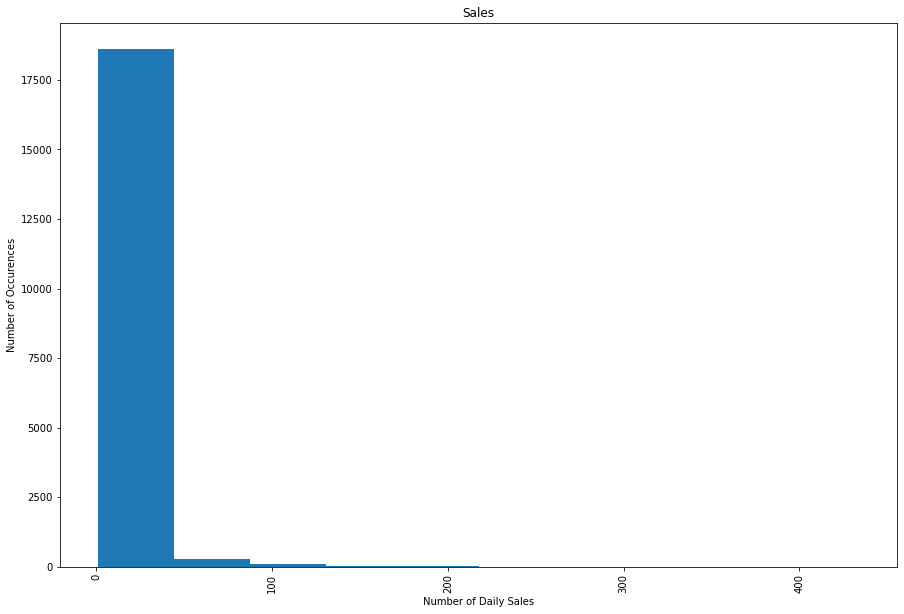

In [23]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation = 90)
plt.title("Sales")
plt.xlabel("Number of Daily Sales")
plt.ylabel("Number of Occurences")
plt.hist(days_without_promotion['DailySales'])

In [24]:
days_with_promotion = train_data.where(train_data['OnPromotion']==1.0)

(array([1292.,  211.,   66.,   29.,   15.,   11.,    2.,    0.,    0.,
           3.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

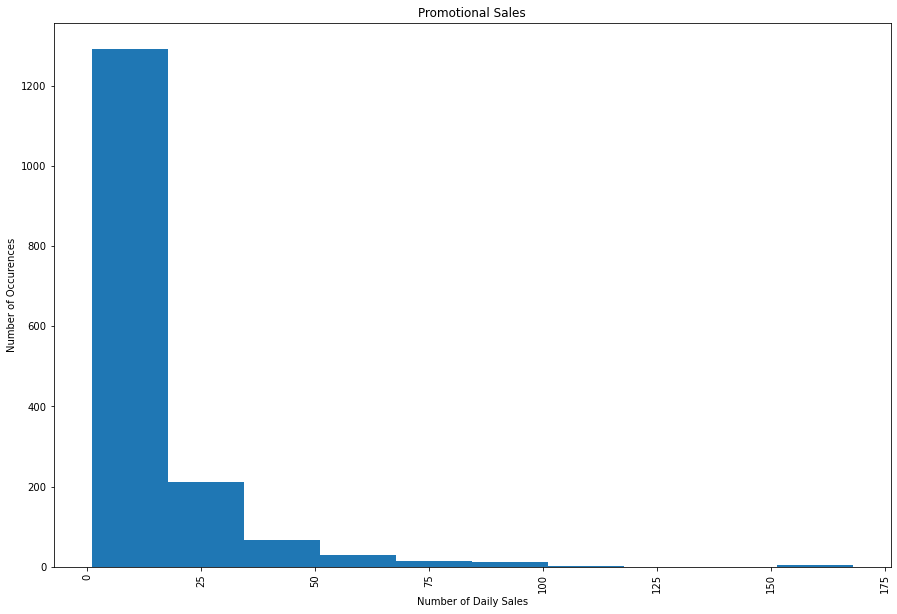

In [85]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation = 90)
plt.title("Promotional Sales")
plt.xlabel("Number of Daily Sales")
plt.ylabel("Number of Occurences")
plt.hist(days_with_promotion['DailySales'])

<BarContainer object of 4 artists>

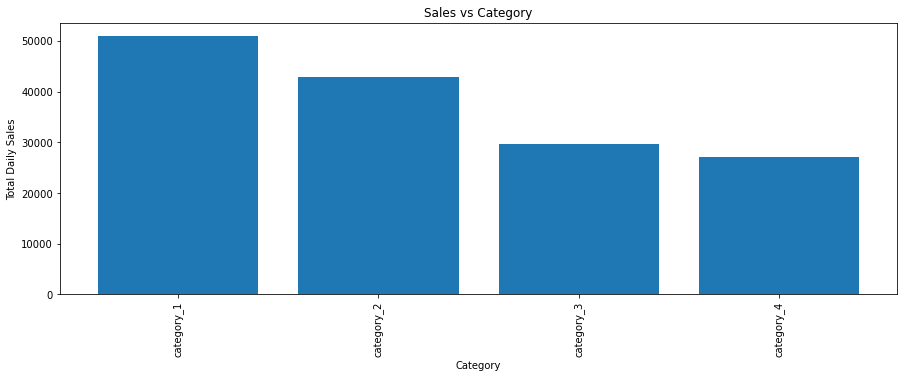

In [26]:
X = train_data.groupby(['CategoryCode']).agg({'DailySales':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.xticks(rotation = 90)
plt.title("Sales vs Category")
plt.xlabel("Category")
plt.ylabel("Total Daily Sales")
plt.bar(X['CategoryCode'],X['DailySales'])

<BarContainer object of 4 artists>

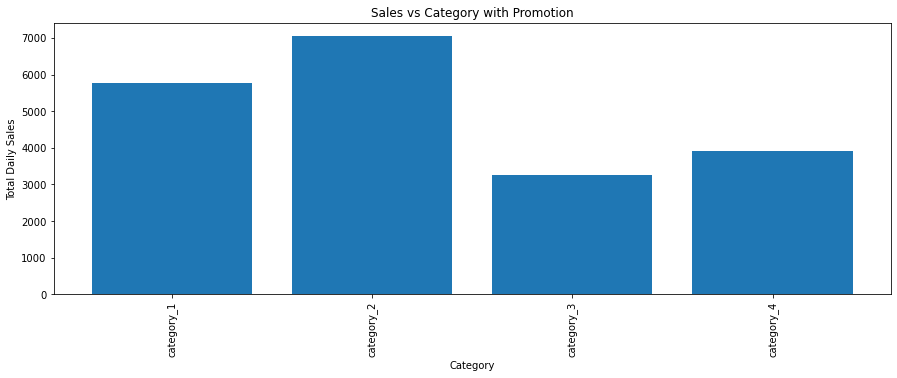

In [77]:
X = days_with_promotion.groupby(['CategoryCode']).agg({'DailySales':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.xticks(rotation = 90)
plt.title("Sales vs Category with Promotion")
plt.xlabel("Category")
plt.ylabel("Total Daily Sales")
plt.bar(X['CategoryCode'],X['DailySales'])

<BarContainer object of 4 artists>

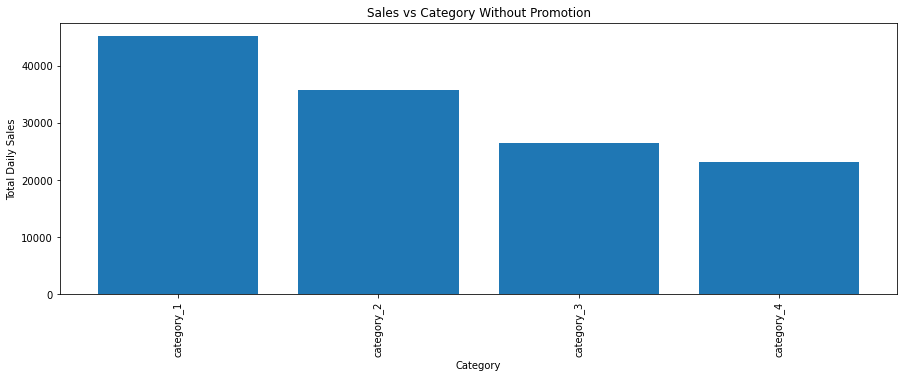

In [78]:
X = days_without_promotion.groupby(['CategoryCode']).agg({'DailySales':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.xticks(rotation = 90)
plt.title("Sales vs Category Without Promotion")
plt.xlabel("Category")
plt.ylabel("Total Daily Sales")
plt.bar(X['CategoryCode'],X['DailySales'])

<BarContainer object of 2 artists>

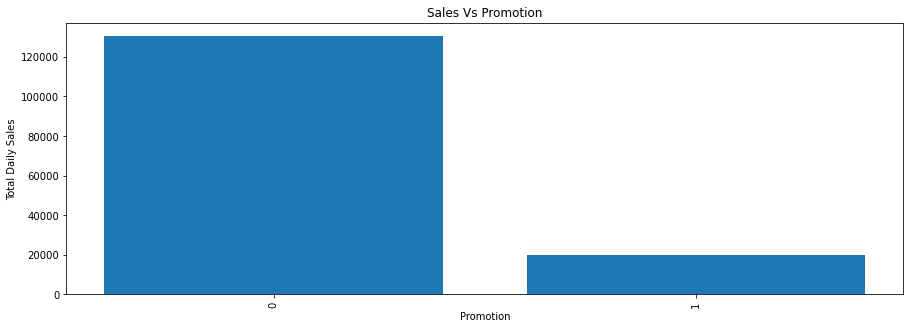

In [83]:
X = train_data.groupby(['OnPromotion']).agg({'DailySales':'sum'})
Xi = [0,1]
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.xticks(Xi,X['OnPromotion'],rotation = 90)
plt.title("Sales Vs Promotion")
plt.xlabel("Promotion")
plt.ylabel("Total Daily Sales")
plt.bar(Xi,X['DailySales'])

<BarContainer object of 23 artists>

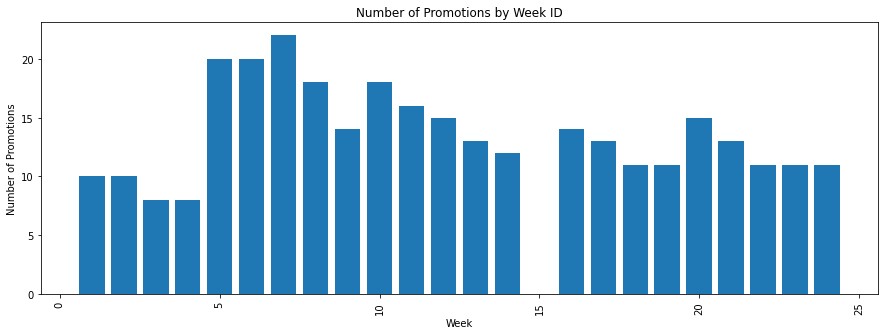

In [35]:
X = promotion_data.groupby(['WeekID']).agg({'OnPromotion':'sum'})
X.reset_index(inplace = True)
plt.figure(figsize=(15, 5))
plt.xticks(rotation = 90)
plt.title("Number of Promotions by Week ID")
plt.xlabel("Week")
plt.ylabel("Number of Promotions")
plt.bar(X['WeekID'],X['OnPromotion'])

In [65]:
train_data_modified = train_data.groupby(['WeekID','ItemCode']).agg({'DailySales':'sum', 'OnPromotion':'max'}).reset_index()
train_data_modified.head()

,WeekID,ItemCode,DailySales,OnPromotion
0,1,3418,45,0
1,1,3427,28,0
2,1,7666,141,1
3,1,9925,7,0
4,1,16936,31,0


In [66]:
train_data_modified['WeeklySales']=train_data_modified['DailySales']
train_data_modified.drop('DailySales',1)

<ipython-input-66-9f250de18c64>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data_modified.drop('DailySales',1)


,WeekID,ItemCode,OnPromotion,WeeklySales
0,1,3418,0,45
1,1,3427,0,28
2,1,7666,1,141
3,1,9925,0,7
4,1,16936,0,31
...,...,...,...,...
3828,20,1101769,0,35
3829,20,1103056,0,10
3830,20,1105009,0,9
3831,20,1105018,0,4


In [67]:
train_data_modified['Last_Week_Sales'] = train_data_modified.groupby(['ItemCode'])['WeeklySales'].shift(1)
train_data_modified['Last_Week_Sales'] = train_data_modified['Last_Week_Sales'].fillna(0)
train_data_modified.head()

,WeekID,ItemCode,DailySales,OnPromotion,WeeklySales,Last_Week_Sales
0,1,3418,45,0,45,0.0
1,1,3427,28,0,28,0.0
2,1,7666,141,1,141,0.0
3,1,9925,7,0,7,0.0
4,1,16936,31,0,31,0.0


In [75]:
train_data_promotion = train_data_modified.where(train_data_modified['OnPromotion']==1.0)
train_data_promotion.dropna()

,WeekID,ItemCode,DailySales,OnPromotion,WeeklySales,Last_Week_Sales
2,1.0,7666.0,141.0,1.0,141.0,0.0
10,1.0,24136.0,39.0,1.0,39.0,0.0
14,1.0,35530.0,14.0,1.0,14.0,0.0
20,1.0,39436.0,239.0,1.0,239.0,0.0
35,1.0,65788.0,50.0,1.0,50.0,0.0
...,...,...,...,...,...,...
3803,20.0,1077118.0,40.0,1.0,40.0,31.0
3810,20.0,1082743.0,25.0,1.0,25.0,58.0
3812,20.0,1085749.0,10.0,1.0,10.0,18.0
3813,20.0,1090024.0,74.0,1.0,74.0,54.0


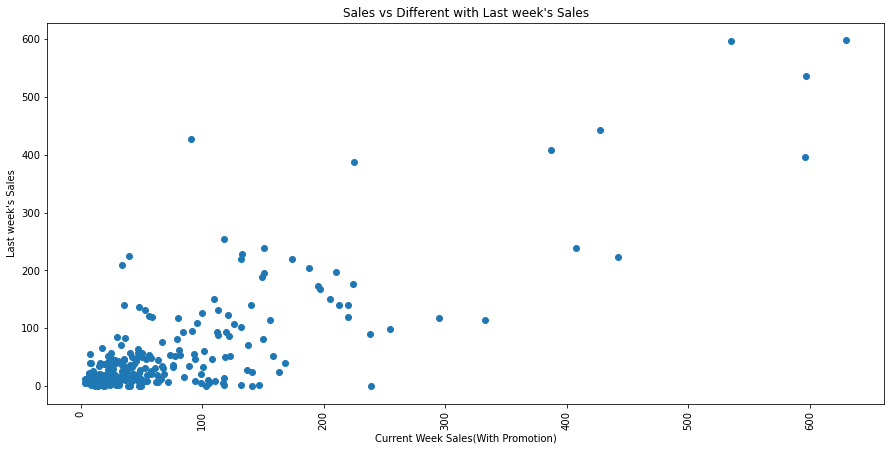

In [76]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation = 90)
plt.title("Sales vs Different with Last week's Sales")
plt.ylabel("Last week's Sales")
plt.xlabel("Current Week Sales(With Promotion)")
plt.scatter(train_data_promotion['WeeklySales'],train_data_promotion['Last_Week_Sales'])